In [12]:
import numpy as np
import time
from tqdm import tqdm # esta librería es para mirar el progreso de un for
import multiprocessing as mp
import matplotlib.pyplot as plt

In [5]:
# Definimos unas secuencias
Secuencia1 = merged_sequence_1
Secuencia2 = merged_sequence_2

#SecuenciaLTR = "CACTAGACTAGACTAGCNAGCTACGCATGGCTACNCTACGACAGCTAGCTANCTATCNACTACNAGCTACTAGCTANNNACTANCTCGACTACGACTACACTGACCACTAGAC"*cant_muestras
#Secuencia1, Secuencia2 = SecuenciaLTR, SecuenciaLTR

# Visualizar el dotplot

In [8]:
import matplotlib.pyplot as plt
def draw_dotplot(matrix, fig_name='dotplot.svg'):
  plt.figure(figsize=(5,5))
  plt.imshow(matrix, cmap='Greys',aspect='auto')

  plt.ylabel("Secuencia 1")
  plt.xlabel("Secuencia 2")
  plt.savefig(fig_name)

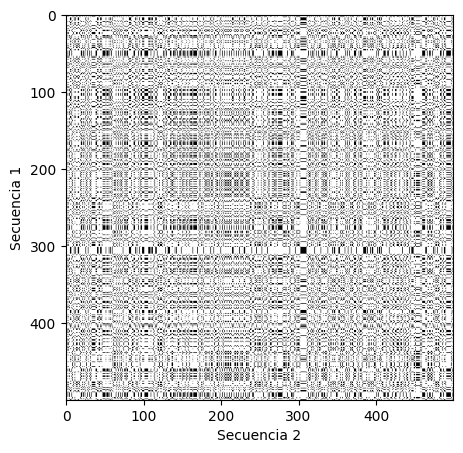

In [11]:
draw_dotplot(dotplot[:500,:500 ])


# Comparemos la misma secuencia ⬆
# Cambiemos la cantidad de muestras ⬆ 

# Ahora vamos a realizar la paralelización con MULTIPROCESSING

La matriz de resultado tiene tamaño: (48320, 48320)
El código se ejecutó en: 299.9898416996002 segundos
La visualización del dotplot tomó: 409.74848318099976 segundos


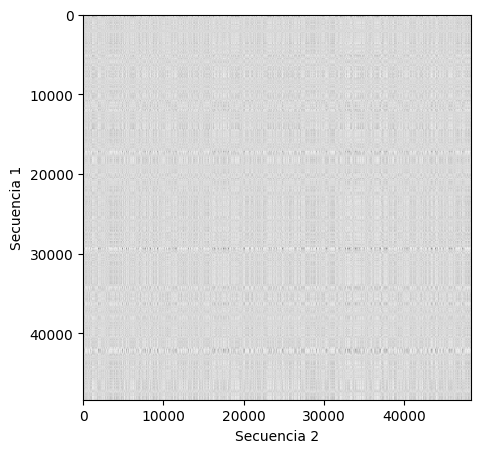

In [10]:
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt
import time

Secuencia1 = merged_sequence_1
Secuencia2 = merged_sequence_2

def worker(args):
    i, Secuencia1, Secuencia2 = args
    return [Secuencia1[i] == Secuencia2[j] for j in range(len(Secuencia2))]

def parallel_dotplot(Secuencia1, Secuencia2, threads=mp.cpu_count()):
    with mp.Pool(processes=threads) as pool:
        result = pool.map(worker, [(i, Secuencia1, Secuencia2) for i in range(len(Secuencia1))])
    return result

begin = time.time()
dotplot = np.array(parallel_dotplot(Secuencia1, Secuencia2, 4))

print("La matriz de resultado tiene tamaño:", dotplot.shape)
print(f"El código se ejecutó en: {time.time() - begin} segundos")

## Vamos a visualizar el dotplot
draw_dotplot(dotplot, fig_name='dotplot_parallel.svg')

end = time.time()
print(f"La visualización del dotplot tomó: {end - begin} segundos")





## Realicemos un ejercicio de análisis de rendimiento 
También probemos con diferentes longitudes de secuencias como es el comportamiento  y  y el escalamiento del algoritmo. 

*   Vamos a analizar el desempeño del programa paralelo respecto al secuencial. (métricas de desempeño)  
*   Revisemos la ley de amdahl
*   Veamos el escalamiento del algoritmo.

In [7]:
#@title Funciones para realizar el análisis
#@markdown draw_dotplot(matrix) \\
#@markdown dotplot_secuencial(Secuencia1, Secuencia2) \\
#@markdown dotplot_multiprocessing(Secuencia1, Secuencia2)

def draw_dotplot(matrix,fig_name='dotplot.svg'):
  plt.figure(figsize=(5,5))
  plt.imshow(matrix, cmap='Greys',aspect='auto')

  plt.ylabel("Secuencia 1")
  plt.xlabel("Secuencia 2")
  plt.savefig(fig_name)

def worker(args):
    i, Secuencia1, Secuencia2 = args
    return [Secuencia1[i] == Secuencia2[j] for j in range(len(Secuencia2))]

def parallel_dotplot(Secuencia1, Secuencia2,threads=mp.cpu_count()):
    with mp.Pool(processes=threads) as pool:
        result = pool.map(worker, [(i, Secuencia1, Secuencia2) for i in range(len(Secuencia1))])
    return result

def dotplot_secuencial(sec1, sec2):
  dotplot = np.empty([len(sec1),len(sec2)])
  #print("La matriz de resultado tiene tamaño: ", dotplot.shape)

  for i in range(dotplot.shape[0]):
    for j in range(dotplot.shape[1]):
      if sec1[i] == sec2[j]:
        dotplot[i,j] = 1
      else:
        dotplot[i,j] = 0

  return dotplot

def dotplot_multiprocessing(sec1,sec2,threads=mp.cpu_count()):
  dotplot = np.array(parallel_dotplot(sec1, sec2,threads))
  return dotplot

In [8]:
# Veamos el tiempo con 1 procesador
"""
begin_secuencial = time.time()
dotplot_secuencial(Secuencia2, Secuencia2)
end_secuencial = time.time()

print(f"el tiempo secuencial es: {end_secuencial-begin_secuencial} ")"""

begin_paralelo = time.time()
dotplot_multiprocessing(Secuencia2, Secuencia2,2)
end_paralelo = time.time()

print(f"el tiempo paralelo es: {end_paralelo-begin_paralelo} ")

el tiempo paralelo es: 224.5335488319397 


In [9]:
n_procesos = [1,2,4,6]
times_nuevos = []  
for i in n_procesos:
    
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia2, Secuencia2,i)
    end_paralelo = time.time()
    times_nuevos.append(end_paralelo-begin_paralelo)   
    print("Dotplot con ",i," procesadores, timepo: ",end_paralelo-begin_paralelo)

Dotplot con  1  procesadores, timepo:  280.00411200523376
Dotplot con  2  procesadores, timepo:  229.73655700683594
Dotplot con  4  procesadores, timepo:  272.9030570983887
Dotplot con  6  procesadores, timepo:  205.45810055732727


In [23]:
n_proc = [1,2]
times = []  
for i in n_proc:
    
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia2, Secuencia2,i)
    end_paralelo = time.time()
    times.append(end_paralelo-begin_paralelo)   
    print("Dotplot con ",i," procesadores, timepo: ",end_paralelo-begin_paralelo)

Dotplot con  1  procesadores, timepo:  377.85113620758057
Dotplot con  2  procesadores, timepo:  317.9503724575043


In [35]:
n_proc2 = [4,6]
times2 = []  
for i in n_proc:
    
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia2, Secuencia2,i)
    end_paralelo = time.time()
    times.append(end_paralelo-begin_paralelo)   
    print("Dotplot con ",i," procesadores, timepo: ",end_paralelo-begin_paralelo)

Dotplot con  4  procesadores, timepo:  323.37532019615173
Dotplot con  6  procesadores, timepo:  474.8607749938965


In [44]:
merged_times = times + times2
merged_procesos = n_proc + n_proc2


[]


In [45]:
print(times2)

[]


In [43]:
print(merged_times)
print(merged_procesos)

[377.85113620758057, 317.9503724575043, 303.9673056602478, 319.633665561676, 323.37532019615173, 474.8607749938965]
[4, 6, 4, 6]


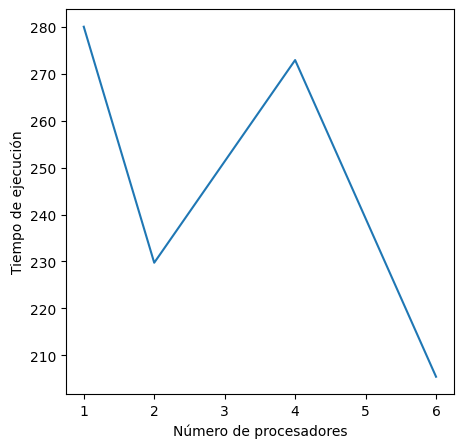

In [10]:
plt.figure(figsize=(5,5))
plt.plot(n_procesos,times_nuevos)  
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.show()

In [15]:
acel = [times_nuevos[0]/i for i in times_nuevos]
efic = [acel[i]/n_procesos[i] for i in range(len(n_procesos))]
print("Aceleración: ",acel)
print("Eficiencia: ",efic)

Aceleración:  [1.0, 1.2188052073789113, 1.0260204300470148, 1.3628282907594902]
Eficiencia:  [1.0, 0.6094026036894556, 0.2565051075117537, 0.22713804845991503]


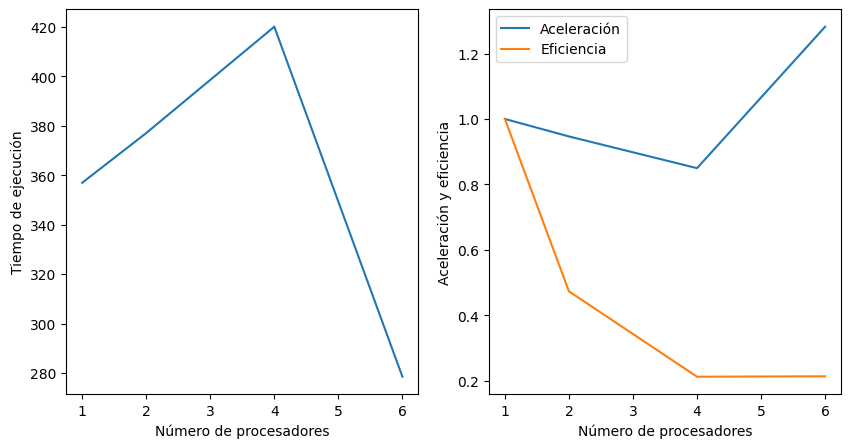

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_proc,times)
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.subplot(1,2,2)
plt.plot(n_proc,acel)
plt.plot(n_proc,efic)
plt.xlabel("Número de procesadores")
plt.ylabel("Aceleración y eficiencia")
plt.legend(["Aceleración","Eficiencia"])
plt.show()


In [61]:
print("Aceleración Maxima: ",max(acel))

Aceleración Maxima:  1.4311567540028045


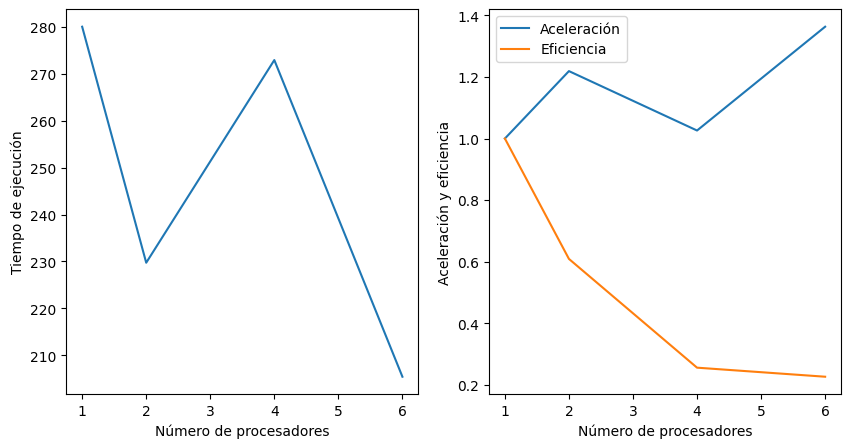

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_procesos,times_nuevos)
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.subplot(1,2,2)
plt.plot(n_procesos,acel)
plt.plot(n_procesos,efic)
plt.xlabel("Número de procesadores")
plt.ylabel("Aceleración y eficiencia")
plt.legend(["Aceleración","Eficiencia"])
plt.show()


### Miremos el escalamiento del algoritmo (Débil y fuerte)

In [18]:
n_proc = [1, 2, 4, 6]
strong_times = []  
weak_times = []

In [19]:

for i in n_proc:
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia2, Secuencia2, i)
    end_paralelo = time.time()
    strong_times.append(end_paralelo - begin_paralelo)   
    print("Dotplot con ", i, " procesadores, tiempo: ", end_paralelo - begin_paralelo)

Dotplot con  1  procesadores, tiempo:  329.08390402793884
Dotplot con  2  procesadores, tiempo:  293.6818974018097
Dotplot con  4  procesadores, tiempo:  216.58462977409363
Dotplot con  6  procesadores, tiempo:  222.8924593925476


In [20]:
for i in n_proc:
    Secuencia = Secuencia2[:len(Secuencia2)*i]  # Incrementa el tamaño de la secuencia.
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia, Secuencia, i)
    end_paralelo = time.time()
    weak_times.append(end_paralelo - begin_paralelo)   
    print("Dotplot con ", i, " procesadores, tiempo: ", end_paralelo - begin_paralelo)

Dotplot con  1  procesadores, tiempo:  282.13386845588684
Dotplot con  2  procesadores, tiempo:  236.17396998405457
Dotplot con  4  procesadores, tiempo:  219.74558115005493
Dotplot con  6  procesadores, tiempo:  216.69090509414673


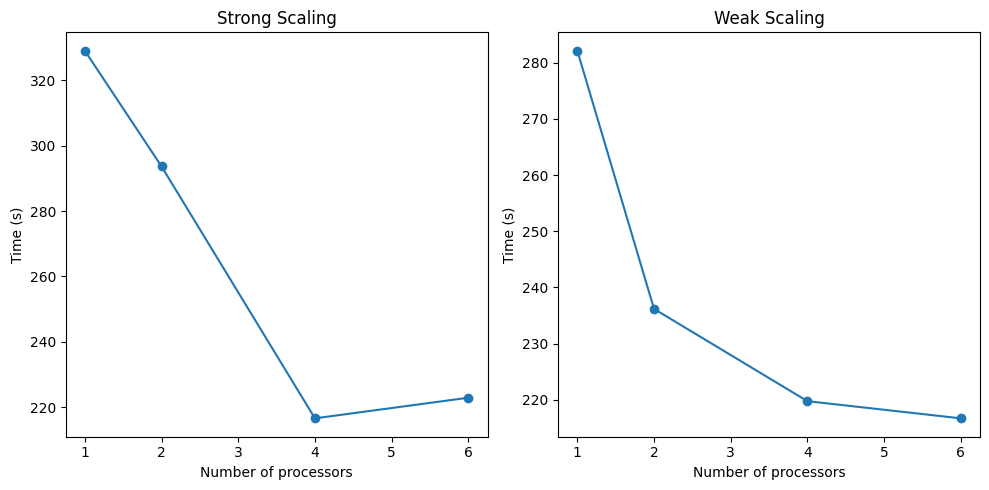

In [21]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_proc, strong_times, marker='o')
plt.title("Strong Scaling")
plt.xlabel("Number of processors")
plt.ylabel("Time (s)")

plt.subplot(1, 2, 2)
plt.plot(n_proc, weak_times, marker='o')
plt.title("Weak Scaling")
plt.xlabel("Number of processors")
plt.ylabel("Time (s)")

plt.tight_layout()
plt.show()

# Actividad:

Realizar el análisis de tiempo de la estrategia teniendo en cuenta el tiempo que le toma al programa guardar la imágen de salida.

# Ahora miremos la estrategia de paralelización con MPI4PY

In [40]:
!mpirun -n 1 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 91.3422167301178 segundos


In [41]:
!mpirun -n 2 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 52.30583643913269 segundos


In [18]:
!mpirun -n 4 python3 dotplotMPI_sln.py

Traceback (most recent call last):
  File "/home/nico/Documents/Universidad/2023-1/Concurrente/concurrente2/SesiónDotplotConcurrente/dotplotMPI_sln.py", line 52, in <module>
    dotplot = comm.gather(dotplot, root=0)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "mpi4py/MPI/Comm.pyx", line 1578, in mpi4py.MPI.Comm.gather
  File "mpi4py/MPI/msgpickle.pxi", line 772, in mpi4py.MPI.PyMPI_gather
  File "mpi4py/MPI/msgpickle.pxi", line 147, in mpi4py.MPI.pickle_dump
  File "mpi4py/MPI/msgbuffer.pxi", line 50, in mpi4py.MPI.downcast
OverflowError: integer 2342656771 does not fit in 'int'
Traceback (most recent call last):
  File "/home/nico/Documents/Universidad/2023-1/Concurrente/concurrente2/SesiónDotplotConcurrente/dotplotMPI_sln.py", line 52, in <module>
    dotplot = comm.gather(dotplot, root=0)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "mpi4py/MPI/Comm.pyx", line 1578, in mpi4py.MPI.Comm.gather
  File "mpi4py/MPI/msgpickle.pxi", line 772, in mpi4py.MPI.PyMPI_gather
  File "

In [44]:
!mpirun -n 8 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 21.823227405548096 segundos


# Carguemos los archivos FASTA que contienen las secuencias

In [1]:
from Bio import SeqIO

def merge_sequences_from_fasta(file_path):
    sequences = []  # List to store all sequences
    for record in SeqIO.parse(file_path, "fasta"):
        # `record.seq` gives the sequence
        sequences.append(str(record.seq))
    return "".join(sequences)

In [2]:
file_path_1 = "/home/nico/Documents/Universidad/2023-1/Concurrente/SesiónDotplotConcurrente/archivosParaDotplot/E_coli.fna"
file_path_2 = "/home/nico/Documents/Universidad/2023-1/Concurrente/SesiónDotplotConcurrente/archivosParaDotplot/Salmonella.fna"

merged_sequence_1 = merge_sequences_from_fasta(file_path_1) # estas son las secuencias que se van a utilizar para el dotplot
merged_sequence_2 = merge_sequences_from_fasta(file_path_2)

In [3]:
print("longitud Archivo 1:", len(merged_sequence_1))
print("longitud Archivo 2:", len(merged_sequence_2))

longitud Archivo 1: 48320
longitud Archivo 2: 48320
